## Import required libraries

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

## Load data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
      path='mnist.npz'
    )

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

### Print shape of dataset

In [ ]:
print('x_train:', x_train.shape, 'y_train:', y_train.shape)
print('x_test:', x_test.shape, 'y_test:', y_test.shape)

x_train: (60000, 28, 28) y_train: (60000,)
x_test: (10000, 28, 28) y_test: (10000,)


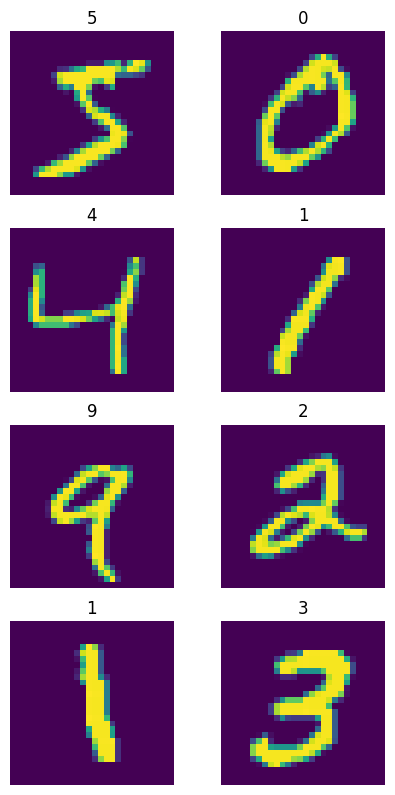

In [ ]:
num_images = 8

plt.figure(figsize=(5, 20))
for i in range(num_images):
  plt.subplot(num_images, 2, i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')


# Build the model

In [ ]:
num_classes = 10
input_shape = (28,28,1)
kernel_size = 5
stride = (1,1)

model = tf.keras.Sequential([
      tf.keras.layers.Rescaling(1./255),

      # 1
      tf.keras.layers.Conv2D(
        filters=6, kernel_size=5, strides=(1,1),
        padding='valid', activation='relu', input_shape=input_shape
      ),
      tf.keras.layers.MaxPool2D(),

      # 2
      tf.keras.layers.Conv2D(
        filters=6, kernel_size=5, strides=(1,1),
        padding='valid', activation='relu', input_shape=input_shape
      ),
      tf.keras.layers.MaxPool2D(),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(120, activation='relu'),
      tf.keras.layers.Dense(84, activation='relu'),

      tf.keras.layers.Dense(num_classes)

])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 48s 25ms/step - loss: 0.2293 - accuracy: 0.9280


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0836 - accuracy: 0.9728


[0.0836094468832016, 0.9728000164031982]

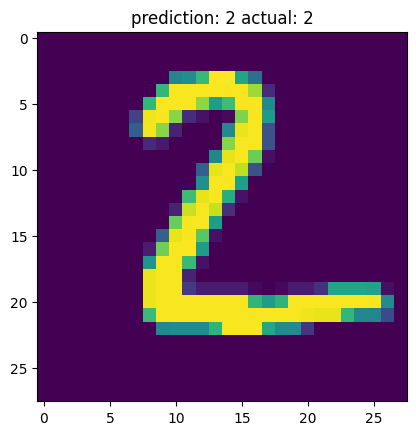

In [ ]:
prediction = model.predict(x_test[1:2], verbose=0)
result = np.argmax(prediction)
actual = y_test[1]

plt.imshow(x_test[1:2].reshape(28,28))
plt.title(f'prediction: {result} actual: {actual}')
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the dataset
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Capture an image of a digit using OpenCV
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if ret:
        cv2_imshow(frame)

        # Wait for the 's' key to be pressed to capture the image
        if cv2.waitKey(1) & 0xFF == ord('s'):
            # Preprocess the captured image
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
            normalized = resized / 255.0
            reshaped = np.reshape(normalized, (1, 28, 28, 1))

            # Perform prediction using the model
            prediction = model.predict(reshaped)
            result = np.argmax(prediction)

            # Display the captured image and the predicted label
            cv2_imshow(resized)
            print(f'Prediction: {result}')

            # Break the loop
            break

# Release the capture and close the window
cap.release()
cv2.destroyAllWindows()


Epoch 1/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1656 - accuracy: 0.9504 - val_loss: 0.0690 - val_accuracy: 0.9779
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.0535 - val_accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0490 - val_accuracy: 0.9841
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.0534 - val_accuracy: 0.9843
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0583 - val_accuracy: 0.9814
